In [ ]:
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/group-1.3-master/group-1.3-master/LeverageJustAFewKeywords/
# %cd /content/drive/MyDrive/LeverageJustAFewKeywords/
%cd /content/drive/MyDrive/group-1.3/LeverageJustAFewKeywords/


In [ ]:
!pip install mittens transformers
import nltk
nltk.download("words")

In [ ]:
import pickle
import os
import json
import torch
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from collections import Counter
import numpy as np

import matplotlib.pyplot as plt


In [1]:
result_dir_eg = '/content/drive/MyDrive/group-1.3/experiments/210725_110640-word2vec_organic'
sub_dir = os.path.join(result_dir_eg, f"v0")
plot_dir = '/content/drive/MyDrive/group-1.3/output/'

NameError: ignored

In [ ]:
with open(os.path.join(sub_dir, 'result.pkl'), 'rb') as f:
    result_dict = pickle.load(f)

In [ ]:
for keys, values in result_dict.items():
    print(f"{keys}:\n{values}\n\n")

loss:
[[1.2549798942963097, 1.2218851469909755, 1.2197938743613173, 1.2191849123408025], [1.1873129277759902, 1.1850707037983654, 1.1854753604541732], [1.1637538974216888, 1.163362322087948], [1.1480748330147188, 1.1476389520201031], [1.1335612793374703, 1.133052343293746], [1.127757496714035, 1.127342375326101]]


agreement_ratio:
[0.6480270028114319, 0.7174294590950012, 0.7473558783531189, 0.7902318239212036, 0.8053833246231079, 0.8094450235366821]


micro_f1:
[0.3400896095583529, 0.36291871132920844, 0.34969063366759123, 0.3371026242799232, 0.3313420098143802, 0.3309152976317474]


macro_f1:
[0.2586041815989559, 0.2101911319281887, 0.1640522218869084, 0.11944905853356559, 0.08887892897525651, 0.08358376546983733]


precision:
[array([0.39408867, 0.31325301, 0.17675255, 0.5626506 , 0.32142857,
       0.30538922]), array([0.4083031 , 0.52631579, 0.19298246, 0.67741935, 0.        ,
       0.28571429]), array([0.37001733, 0.        , 0.21868979, 0.70053476, 0.        ,
       0.        

In [ ]:
result['ground_class_distribution']

{0: 1549, 1: 296, 2: 483, 3: 1314, 4: 576, 5: 469}

## qualitative evaluation

In [ ]:
%cd /content/drive/MyDrive/group-1.3/LeverageJustAFewKeywords/
from model import Student
from train import Trainer

/content/drive/MyDrive/group-1.3/LeverageJustAFewKeywords


In [ ]:
with open(os.path.join(sub_dir, 'config.json'), 'rb') as f:
    hparam = json.load(f)

In [ ]:
# student = Student(hparam['student'], 'organic')
# ckpt_path = os.path.join(sub_dir, 'teacher_student.pt')
# student.load_state_dict(torch.load(ckpt_path)['student'])

INFO:gensim.models.utils_any2vec:loading projection weights from ../wv/w2v_corpus_wotf1_wostw_tuned.bin
INFO:gensim.models.utils_any2vec:loaded (25694, 300) matrix from ../wv/w2v_corpus_wotf1_wostw_tuned.bin
INFO:root:[organic] load pre-defined word vectors from ../wv/w2v_corpus_wotf1_wostw_tuned.bin


<All keys matched successfully>

In [ ]:
trainer = Trainer(hparam, 'cuda')
trainer.student.load_state_dict(torch.load(ckpt_path)['student'])
trainer.z = torch.load(ckpt_path)['teacher_z']

INFO:root:loading dataset...
INFO:root:[organic] dataset from following files: ../processed/organic_train.json, ../processed/organic_vocab_w2v.txt, ../processed/organic_train_supplement_w2v.pkl, ../processed/seedwords_30_coarse.txt
INFO:root:[organic] dataset_size: 438241
INFO:root:[organic] number of aspects: 6
INFO:root:[organic] number of unique seed words: 168
INFO:root:[organic] test dataset from following files: ../processed/annotated_test_coarse.json, ../processed/organic_vocab_w2v.txt, ../processed/organic_test_coarse_supplement_w2v.pkl, ../processed/seedwords_30_coarse.txt
INFO:root:[organic] test dataset size: 4687
INFO:root:loading model...
INFO:gensim.models.utils_any2vec:loading projection weights from ../wv/w2v_corpus_wotf1_wostw_tuned.bin
INFO:gensim.models.utils_any2vec:loaded (25694, 300) matrix from ../wv/w2v_corpus_wotf1_wostw_tuned.bin
INFO:root:[organic] load pre-defined word vectors from ../wv/w2v_corpus_wotf1_wostw_tuned.bin


In [ ]:
trainer.student.eval()
result = []
ground = []
for batch in trainer.test_loader:
    idx, bow, labels, act_len = batch
    idx, act_len = idx.to(trainer.device), act_len.to(trainer.device)
    with torch.no_grad():
        logits = trainer.student(idx, act_len)
        result.append(logits.max(-1)[1].cpu())
        ground.append(labels.max(-1)[1].cpu())
result = torch.cat(result, dim=0).numpy()
ground = torch.cat(ground, dim=0).numpy()
micro_f1 = f1_score(ground, result, average='micro')

In [ ]:
micro_f1

0.40558992959248985

In [ ]:
ground_dist = dict(Counter(ground))
pred_dist = dict(Counter(result))
conf_mat = confusion_matrix(ground, result)
print(sorted(ground_dist.items(), key=lambda d: d[0]))
print(sorted(pred_dist.items(), key=lambda d: d[0]))
print(conf_mat)

[(0, 1549), (1, 296), (2, 483), (3, 1314), (4, 576), (5, 469)]
[(0, 1998), (1, 34), (2, 1831), (3, 810), (5, 14)]
[[933   1 515  97   0   3]
 [117  26 147   6   0   0]
 [ 86   1 370  26   0   0]
 [263   0 488 562   0   1]
 [371   3 174  28   0   0]
 [228   3 137  91   0  10]]


In [ ]:
idx_list = np.arange(len(ground))
idx_storage = {}
for cls in ground_dist.keys():
    true_idx_mask = np.array(result == cls) & np.array(ground == cls) # & np.array(trainer.test_ds.data_length) > 5
    false_idx_mask = np.array(result == cls) & np.array(ground != cls) # & np.array(trainer.test_ds.data_length) > 5
    idx_storage[cls] = {}
    idx_storage[cls]['true'] = idx_list[true_idx_mask]
    idx_storage[cls]['false'] = idx_list[false_idx_mask]

In [ ]:
print_idx = idx_storage[1]['false']

In [ ]:
np.array(trainer.test_ds.data_orig)[print_idx]

array(['This adds to the cost of produce.',
       '(Not enough to pay more for them, but still.)',
       'They were even more profitable when the conventional-farming premiums were added to the cost.',
       'Except on the basis of cost, for those who cannot afford to pay a premium for certified organic goods.',
       'There is no getting away from the fact that Organic means more time, and less productivity, all that costs money.',
       'This is the most notable in organic food which must pay extra regulation fees to use the term “organic”.',
       'Their economic incentives are to try to reduce the costs of organic farming while still commanding the higher price that an organic label will get them.',
       'Farmers that grow organic can charge a higher price to compensate for their reduced yield, and this guy can afford to pay extra if it makes him feel better.'],
      dtype='<U979')

In [ ]:
ground[print_idx]

array([0, 2, 5, 4, 5, 4, 4, 5])

## distribution

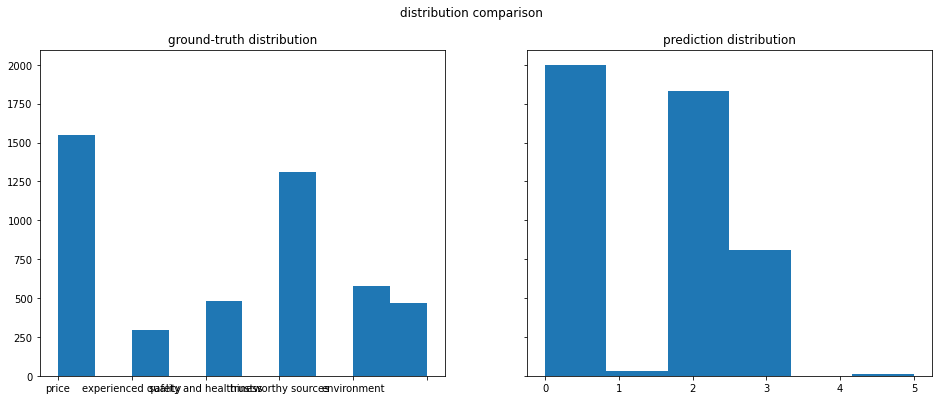

In [ ]:
# plt.figure(figsize=(16,10))
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('distribution comparison')
fig.set_size_inches(16,6)
# ax1.hist(ground, bins=len(ground_dist))
ax1.hist(ground)
ax1.set_xticklabels(organic_aspect)
ax1.set_title("ground-truth distribution")
ax2.hist(result, bins=len(ground_dist))
ax2.set_title("prediction distribution")
# axs[1].hist(result, title='prediction distribution')
# plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'distribution.jpg'))
plt.show()


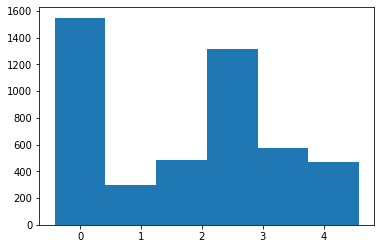

In [ ]:
plt.hist(ground, bins=6, align='left')
# plt.xticks(x, organic_aspect)
plt.show()

## confusion_matrix

In [ ]:
import pandas as pd
with open('../processed/organic_aspect_name_coarse.txt', 'r') as f:
    line = f.readline()
    organic_aspect = line.strip().split('|')
organic_aspect

['general',
 'price',
 'experienced quality',
 'safety and healthiness',
 'trustworthy sources',
 'environment']

In [ ]:
pd.DataFrame(conf_mat, organic_aspect, organic_aspect)

,general,price,experienced quality,safety and healthiness,trustworthy sources,environment
general,933,1,515,97,0,3
price,117,26,147,6,0,0
experienced quality,86,1,370,26,0,0
safety and healthiness,263,0,488,562,0,1
trustworthy sources,371,3,174,28,0,0
environment,228,3,137,91,0,10


In [ ]:
!pip install prettytable

In [ ]:
from prettytable import PrettyTable
t = PrettyTable([''] + organic_aspect)
for i, r in enumerate(conf_mat):
    t.add_row([organic_aspect[i]] + list(r))
    # print([organic_aspect[i]] + r)
print(t)

+------------------------+---------+-------+---------------------+------------------------+---------------------+-------------+
|                        | general | price | experienced quality | safety and healthiness | trustworthy sources | environment |
+------------------------+---------+-------+---------------------+------------------------+---------------------+-------------+
|        general         |   933   |   1   |         515         |           97           |          0          |      3      |
|         price          |   117   |   26  |         147         |           6            |          0          |      0      |
|  experienced quality   |    86   |   1   |         370         |           26           |          0          |      0      |
| safety and healthiness |   263   |   0   |         488         |          562           |          0          |      1      |
|  trustworthy sources   |   371   |   3   |         174         |           28           |          0  

# oposum dataset average result

In [ ]:
import pickle
import numpy as np

In [ ]:
oposum_result_path = '/content/drive/MyDrive/group-1.3/LeverageJustAFewKeywords/experiments/IMPORTANT-210714_064936-word2vec'

In [ ]:
with open(os.path.join(oposum_result_path, 'bags_and_cases', 'v0', 'result.pkl'), 'rb') as f:
    oposum_result = pickle.load(f)

In [ ]:
np.max(oposum_result['micro_f1'])

0.4777947932618683

In [ ]:
oposum_domains = ['bags_and_cases', 'bluetooth', 'boots', 'keyboards', 'tv', 'vacuums']
key_interest = 'micro_f1'
value_interest = []
for domain in oposum_domains:
    for i in range(5):
        with open(os.path.join(oposum_result_path, domain, f'v{i}', 'result.pkl'), 'rb') as f:
            oposum_result = pickle.load(f)
        v = np.max(oposum_result[key_interest])
        value_interest.append(v)
    print(f"[{domain}] {key_interest}: {np.mean(value_interest)}\n")

[bags_and_cases] micro_f1: 0.4756508422664624

[bluetooth] micro_f1: 0.5396245215830063

[boots] micro_f1: 0.5257296070986551

[keyboards] micro_f1: 0.5357012167853094

[tv] micro_f1: 0.542487674998928

[vacuums] micro_f1: 0.5462251092827324

